In [132]:
# replacing class names with numbers
def preprocessIris(infile,outfile):

    stext1 = 'Iris-setosa'
    stext2 = 'Iris-versicolor'
    stext3 = 'Iris-virginica'
    rtext1 = '0'
    rtext2 = '1'
    rtext3 = '2'

    fid = open(infile,"r")
    oid = open(outfile,"w")

    for s in fid:
        if s.find(stext1)>-1:
            oid.write(s.replace(stext1, rtext1))
        elif s.find(stext2)>-1:
            oid.write(s.replace(stext2, rtext2))
        elif s.find(stext3)>-1:
            oid.write(s.replace(stext3, rtext3))
    fid.close()
    oid.close()


In [133]:

import numpy as np
#preprocessIris('iris.data.csv','iris_proc.data')

#loading data
iris = np.loadtxt('banknote.csv',delimiter=',')
#normalizing the input
iris[:,:4] = iris[:,:4]-iris[:,:4].mean(axis=0)
imax = np.concatenate((iris.max(axis=0)*np.ones((1,5)),np.abs(iris.min(axis=0)*np.ones((1,5)))),axis=0).max(axis=0)
iris[:,:4] = iris[:,:4]/imax[:4]

#sample output
print (iris[0:5,:])


[[ 0.42642255  0.42966245 -0.25438505  0.10122506  0.        ]
 [ 0.55006091  0.39788892 -0.23328978 -0.0367623   0.        ]
 [ 0.45911455 -0.29057161  0.03185603  0.17645604  0.        ]
 [ 0.40435144  0.48424514 -0.32721727 -0.3266131   0.        ]
 [-0.01397774 -0.40633125  0.19202762  0.02757498  0.        ]]


In [134]:
print(iris.shape)

(1372, 5)


In [135]:

# Split into training, validation, and test sets
target = np.zeros((np.shape(iris)[0],2))
indices = np.where(iris[:,4]==0) 
target[indices,0] = 1
indices = np.where(iris[:,4]==1)
target[indices,1] = 1
#indices = np.where(iris[:,4]==2)
#target[indices,2] = 1

# Randomly order the data
order = np.arange(np.shape(iris)[0])

np.random.shuffle(order)
iris = iris[order,:]
target = target[order,:]

train = iris[::2,0:4]
traint = target[::2]
valid = iris[1::4,0:4]
validt = target[1::4]
test = iris[3::4,0:4]
testt = target[3::4]

print (train.max(axis=0), train.min(axis=0))


[0.81991704 0.70270331 0.94137246 0.4949548 ] [-0.96127523 -0.95425427 -0.40434476 -1.        ]


In [136]:
# Train the network
import MLP as mlp
net = mlp.mlp(train,traint,20, outtype='logistic')
net.earlystopping(train,traint,valid,validt,0.1)
cm = net.confmat(test,testt)

1
Iteration:  0  Error:  172.25374267512274
2
Iteration:  0  Error:  186.5038862009149
3
Iteration:  0  Error:  186.50163225703525
Stopped 102.01329341965177 102.01294511540866 102.00591661968596
Confusion matrix is:
[[130.   0.]
 [ 55. 158.]]
Percentage Correct:  83.96501457725948


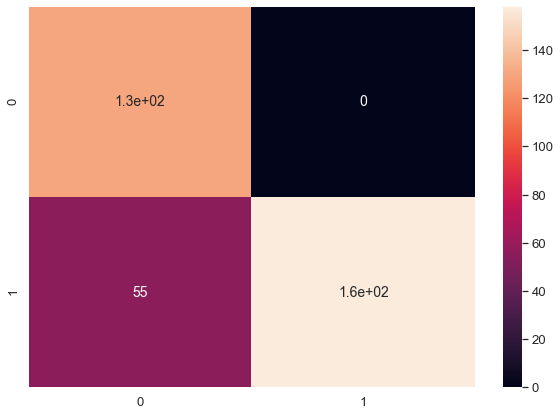

In [139]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm = np.array(cm)
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sn.set(font_scale=1.2)  # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14})  # font size
plt.show()

In [140]:
from sklearn.metrics import classification_report
targets=testt
inputs = np.concatenate((test, -np.ones((np.shape(test)[0], 1))), axis=1)
nclasses = np.shape(targets)[1]
output = net.mlpfwd(inputs)
if nclasses == 1:
    nclasses = 2
    output = np.where(output > 0.5, 1, 0)
else:
    # 1-of-N encoding
    output = np.argmax(output, 1)
    targets = np.argmax(targets, 1)


print(classification_report(targets, output))

              precision    recall  f1-score   support

           0       1.00      0.70      0.83       185
           1       0.74      1.00      0.85       158

    accuracy                           0.84       343
   macro avg       0.87      0.85      0.84       343
weighted avg       0.88      0.84      0.84       343

